In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib as plot
import matplotlib.pyplot as pt

In [3]:
rhd=pd.read_csv("data\HousingPrices.csv")

Data Exploration


In [4]:
rhd.describe(include='all')

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,21613,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613,2124,...,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
unique,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,15 April 2016,NaN,NaN,NaN,NaN,NaN,NaN,No,Twice,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2231,NaN,NaN,NaN,NaN,NaN,NaN,21450,963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,NaN,NaN,...,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,NaN,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,NaN,NaN,...,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,NaN,NaN,...,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,NaN,NaN,...,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,NaN,NaN,...,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,NaN,NaN,...,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [5]:
q1=rhd['Sale Price'].quantile(0.25)
q3=rhd['Sale Price'].quantile(0.75)
iqr=q3-q1
iqr

323050.0

In [6]:
upper= q3+1.5*iqr
lower=q1-1.5*iqr
upper,lower

(1129575.0, -162625.0)

In [7]:
def limit(value):
    if value>upper:
        return upper
    elif value<lower:
        return lower
    else:
        return value       

In [8]:
rhd['Sale Price']=rhd['Sale Price'].apply(limit)

In [9]:
rhd.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.116186e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,2.500620e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,1.129575e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x163f7f57d10>,
 'caps': [<matplotlib.lines.Line2D at 0x163f4985bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x163f7e37090>],
 'medians': [<matplotlib.lines.Line2D at 0x163f7f43090>],
 'fliers': [<matplotlib.lines.Line2D at 0x163f7f43ad0>],
 'means': []}

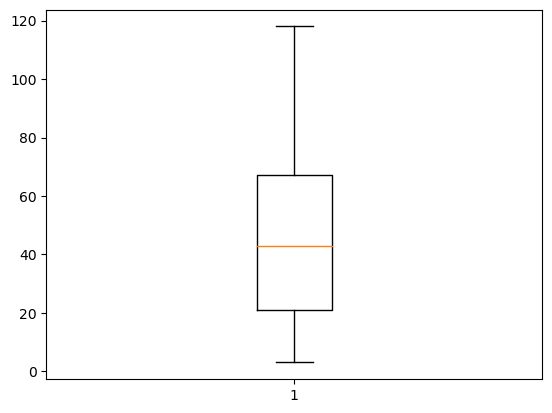

In [10]:
pt.boxplot(rhd['Age of House (in Years)'])


In [11]:
rhd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

Data Processing

In [12]:
# since there are missing values in target variable we delete the row rather than imputing
rhd.dropna(inplace = True, axis=0,subset=['Sale Price'])

In [13]:
numerical_column=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)',
                 'Area of the House from Basement (in Sqft)','Zipcode',
                 'Longitude','Living Area after Renovation (in Sqft)']

In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
rhd[numerical_column] = imputer.fit_transform(rhd[numerical_column])

In [15]:
rhd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [16]:
col=rhd['Latitude'].values.reshape(-1,1)
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
rhd['Latitude']=imputer.fit_transform(col)

In [17]:
rhd['Zipcode']= rhd['Zipcode'].astype(object)
rhd.dtypes


ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                       object
Latitude                                     float64
Longitude                                    f

In [18]:
m={'nan': '0',
    'Once': '1',
    'Twice': '2',
    'Thrice':'3',
  'Four':'4'}
rhd['No of Times Visited'] = rhd['No of Times Visited'].map(m)

In [19]:
rhd['No of Times Visited'].fillna('0',inplace=True)
rhd['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [20]:
rhd['Ever Renovate'] = np.where(rhd['Renovated Year']==0,'No','Yes')

In [21]:
rhd['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [22]:
condition_mapping = {'Bad': 1, 'Okay': 2, 'Fair': 3, 'Good': 4, 'Excellent': 5}
rhd['Condition of the House'] = rhd['Condition of the House'].map(condition_mapping)

In [23]:
RenovateMap={'Yes':1,'No':0}

rhd['Waterfront View']=rhd['Waterfront View'].map(RenovateMap)

In [24]:
rhd.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,No
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,No


In [25]:
rhd['Purchase Year'] = pd.DatetimeIndex(rhd['Date House was Sold']).year

In [26]:
rhd['Years Since Renovation'] = np.where(rhd['Ever Renovate'] == 'Yes',
                                                     abs(rhd['Purchase Year'] - 
                                                        rhd['Renovated Year']), 0)

In [27]:
rhd.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovate,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,0


In [28]:
rhd.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year', 'Ever Renovate'], inplace = True)

In [29]:
rhd.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,3,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,3,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,0,0,3,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,5,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,3,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0


Scaling the data

In [30]:
from sklearn.preprocessing import StandardScaler
# rhd=pd.read_csv("data\Transformed_Housing_Data.csv")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(rhd)
Y=rhd['Sale Price']
X=scaler.fit_transform(rhd.drop(columns = ['Sale Price']))
X=pd.DataFrame(data = X, columns = rhd.drop(columns = ['Sale Price']).columns)
X.head()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
0,0.885986,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.087181,-0.30579,-0.629203,-0.563993,-0.734722,-0.658697,0.544734,1.870134,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463
1,0.637358,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.087181,-0.30579,-0.629203,-0.563993,0.460990,0.245134,0.680915,0.879570,1.161645,-0.746479,-0.432664,-0.187900,4.757239
2,0.365299,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.087181,-0.30579,-0.629203,-1.468566,-1.229916,-0.658697,1.293731,-0.933349,1.283619,-0.135806,1.070082,-0.172409,-0.167463
3,-0.727767,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.087181,-0.30579,2.444136,-0.563993,-0.891735,1.397518,0.204281,1.085159,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463
4,-0.912987,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.087181,-0.30579,-0.629203,0.340581,-0.130827,-0.658697,-0.544715,-0.073614,0.409587,1.199152,-0.272177,-0.192880,-0.167463


Checking for Multi-collinearity

In [31]:
X.corr()

,ID,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
ID,1.000000,0.001450,0.005233,-0.012379,-0.132153,0.018653,-0.002733,0.011552,-0.023837,0.013762,-0.010724,-0.005189,-0.021524,-0.008273,-0.001983,0.020720,-0.002913,-0.138843,-0.016227
No of Bedrooms,0.001450,1.000000,0.515813,0.576628,0.031692,0.175536,-0.006578,0.079575,0.028556,0.349223,0.477549,0.303294,-0.154113,-0.152747,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.005233,0.515813,1.000000,0.754568,0.087732,0.500776,0.063761,0.187791,-0.124891,0.635638,0.685088,0.283798,-0.505954,-0.203968,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),-0.012379,0.576628,0.754568,1.000000,0.172721,0.354142,0.103841,0.284678,-0.058922,0.705725,0.876226,0.435142,-0.318146,-0.199384,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),-0.132153,0.031692,0.087732,0.172721,1.000000,-0.005162,0.021605,0.074668,-0.009049,0.102314,0.183492,0.015252,-0.053119,-0.129542,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.018653,0.175536,0.500776,0.354142,-0.005162,1.000000,0.023719,0.029504,-0.263669,0.461368,0.524031,-0.245572,-0.489244,-0.059223,0.049692,0.125620,0.280106,-0.011204,-0.000901
Waterfront View,-0.002733,-0.006578,0.063761,0.103841,0.021605,0.023719,1.000000,0.401856,0.016650,0.070332,0.072099,0.080595,0.026149,0.030289,-0.014275,-0.041927,0.086467,0.030699,0.105044
No of Times Visited,0.011552,0.079575,0.187791,0.284678,0.074668,0.029504,0.401856,1.000000,0.045978,0.223661,0.167812,0.276974,0.053395,0.084840,0.006162,-0.078453,0.280452,0.072561,0.093546
Condition of the House,-0.023837,0.028556,-0.124891,-0.058922,-0.009049,-0.263669,0.016650,0.045978,1.000000,-0.143747,-0.158167,0.173999,0.361383,0.003097,-0.015008,-0.106556,-0.092884,-0.003426,-0.011216
Overall Grade,0.013762,0.349223,0.635638,0.705725,0.102314,0.461368,0.070332,0.223661,-0.143747,1.000000,0.705153,0.145232,-0.456711,-0.185855,0.111226,0.201736,0.681362,0.107581,-0.024388


In [32]:
k=X.corr()
z=[[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>0.5) & (i!=j)]
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X.copy()
vif = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
vif


ID                                              1.028362
No of Bedrooms                                  1.631506
No of Bathrooms                                 3.303737
Flat Area (in Sqft)                          1481.560384
Lot Area (in Sqft)                              2.107949
No of Floors                                    2.026026
Waterfront View                                 1.206114
No of Times Visited                             1.431762
Condition of the House                          1.225070
Overall Grade                                   2.767701
Area of the House from Basement (in Sqft)    1205.354045
Basement Area (in Sqft)                       345.446726
Age of House (in Years)                         2.336302
Zipcode                                         1.661580
Latitude                                        1.175515
Longitude                                       1.814410
Living Area after Renovation (in Sqft)          2.978935
Lot Area after Renovation (in S

In [34]:
def MultiC_remover(data):
    vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
    if vif.max()>5:
        print(vif[vif==vif.max()].index[0],' has been removed')
        data=data.drop(columns = [vif[vif==vif.max()].index[0]])
        return data
    else:
        print("No MultiCollinearity Present anymore")
        return data

In [35]:
for i in range(7):
    vif_data=MultiC_remover(vif_data)
vif_data.head()

Flat Area (in Sqft)  has been removed
No MultiCollinearity Present anymore
No MultiCollinearity Present anymore
No MultiCollinearity Present anymore
No MultiCollinearity Present anymore
No MultiCollinearity Present anymore
No MultiCollinearity Present anymore


,ID,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Years Since Renovation
0,0.885986,-0.398724,-1.447526,-0.228291,-0.915389,-0.087181,-0.30579,-0.629203,-0.563993,-0.734722,-0.658697,0.544734,1.870134,-0.352576,-0.306226,-0.943307,-0.260741,-0.167463
1,0.637358,-0.398724,0.175684,-0.189858,0.936817,-0.087181,-0.30579,-0.629203,-0.563993,0.460990,0.245134,0.680915,0.879570,1.161645,-0.746479,-0.432664,-0.187900,4.757239
2,0.365299,-1.474115,-1.447526,-0.123276,-0.915389,-0.087181,-0.30579,-0.629203,-1.468566,-1.229916,-0.658697,1.293731,-0.933349,1.283619,-0.135806,1.070082,-0.172409,-0.167463
3,-0.727767,0.676667,1.149611,-0.243983,-0.915389,-0.087181,-0.30579,2.444136,-0.563993,-0.891735,1.397518,0.204281,1.085159,-0.283288,-1.271941,-0.914127,-0.284546,-0.167463
4,-0.912987,-0.398724,-0.148958,-0.169628,-0.915389,-0.087181,-0.30579,-0.629203,0.340581,-0.130827,-0.658697,-0.544715,-0.073614,0.409587,1.199152,-0.272177,-0.192880,-0.167463


Train and test the model

In [36]:
x=vif_data
y=rhd['Sale Price']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 18), (6483, 18), (15126,), (6483,))

Linear Regression


In [38]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
lr.coef_

array([  -922.50256263, -10011.44980808,  21584.10016679,  11279.27211342,
        15996.21651179,   9024.82218729,  28000.16439301,  15879.60796362,
        89351.4191362 ,  69682.14913335,  31970.97105028,  58821.58715616,
       -16886.40297221,  77721.49148859, -14716.54940543,  34068.73052236,
        -6792.93543908,    873.94692983])

In [40]:
predicted_train=lr.predict(x_test)
print(predicted_train.shape)
lr.score(x_test,y_test)

(6483,)


0.7542623812000507

<Axes: xlabel='Sale Price'>

<Figure size 1000x800 with 0 Axes>

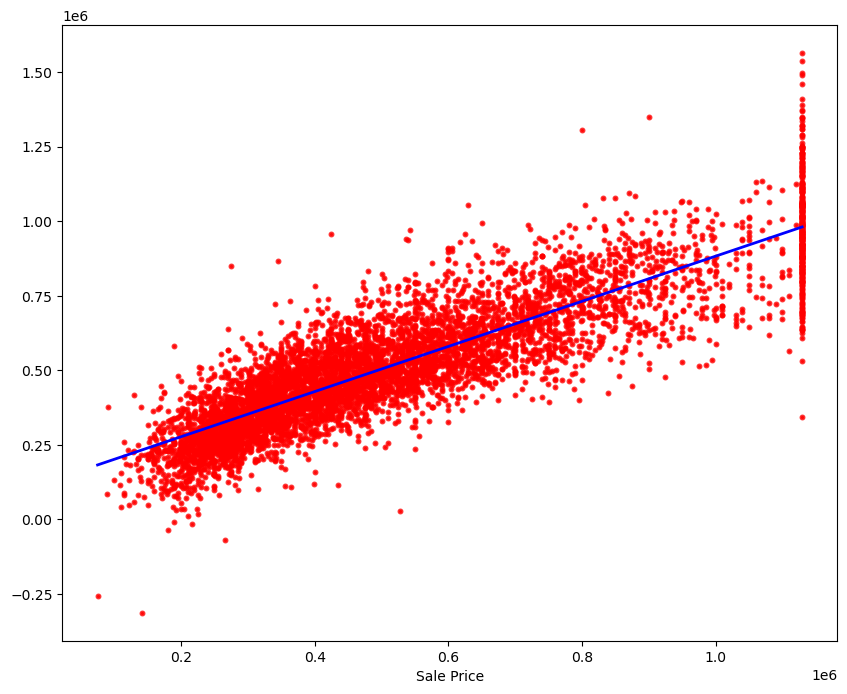

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
# sns.regplot(x=y_test, y=predicted_train, ci=None, scatter_kws={'color':'r', 's':5, 'linewidths': 2})
plt.figure(figsize=(10, 8))
sns.regplot(x=y_test, y=predicted_train, ci=None, scatter_kws={'color':'r', 's':5, 'linewidths': 2}, line_kws={'color':'blue', 'linewidth': 2})
